<a href="https://colab.research.google.com/github/rochinha23/Curso-Data-Science-e-Machine-Learning-com-Estatistica-e-Python/blob/main/Estatistica_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regressão linear** equação que estima um y atraves do x

**Importar pandas e matplotlib**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Criar um Data Frame de faturamento mensal de 12 meses**

In [2]:
faturamento = [25,38,29,115,82,114,120,160,153,190,239,175]

In [4]:
mes = list(range(1,13))

In [5]:
data_dict = {'mes': mes, 'faturamento': faturamento}

In [6]:
data_dict

{'faturamento': [25, 38, 29, 115, 82, 114, 120, 160, 153, 190, 239, 175],
 'mes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

In [7]:
data = pd.DataFrame.from_dict(data_dict)

In [8]:
data

,mes,faturamento
0,1,25
1,2,38
2,3,29
3,4,115
4,5,82
5,6,114
6,7,120
7,8,160
8,9,153
9,10,190


**Visualizar dados em Gráfico de dispersão**

In [9]:
x = data['mes']
y = data['faturamento']


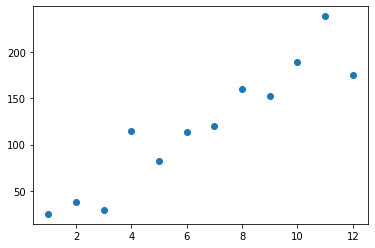

In [11]:
plt.scatter(x,y)
plt.show()

In [12]:
data[['mes','faturamento']].corr()

,mes,faturamento
mes,1.000000,0.935045
faturamento,0.935045,1.000000


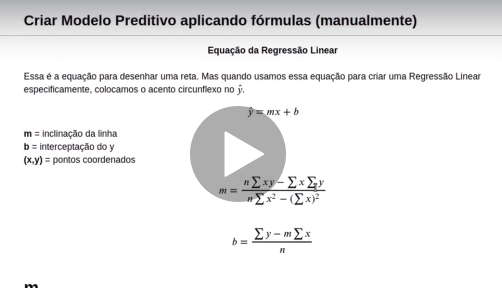

n = numero de observações


encontrando o valor de **m**

In [23]:
somatorioX = x.sum()

In [24]:
somatorioY = y.sum()

In [15]:
x*y

0       25
1       76
2       87
3      460
4      410
5      684
6      840
7     1280
8     1377
9     1900
10    2629
11    2100
dtype: int64

In [16]:
x**2

0       1
1       4
2       9
3      16
4      25
5      36
6      49
7      64
8      81
9     100
10    121
11    144
Name: mes, dtype: int64

In [21]:
somatorioXY = (x*y).sum()

In [22]:
somatorioXquadrado = (x**2).sum()

In [20]:
n = len(data['mes'])
n

12

In [25]:
m = ((n*somatorioXY) - (somatorioX*somatorioY))/ ((n*somatorioXquadrado) - ((somatorioX)**2) )

In [27]:
m.round(4)

17.5385

encontrando o valor de **b**

In [28]:
b = (somatorioY - (m*somatorioX))/n

In [31]:
b.round()

6.0

**Modelo Preditivo**

Criar modelo preditivo para prever (ou estimar) o rendimento de qualquer mês

y = mx + b

In [32]:
xpred = 24

In [35]:
ypred = m*xpred + b

In [36]:
ypred

426.92307692307696

**Predições para os 12 meses**

Criar uma lista contendo as predições para cada um dos 12 meses

In [42]:
xpred1a12 = 1
listapred1ao12 = []
for _ in range(1,13):
  ypred1ao12 = m*xpred1a12 + b
  listapred1ao12.append(ypred1ao12)
  xpred1a12+=1

In [43]:
listapred1ao12

[23.538461538461522,
 41.07692307692306,
 58.6153846153846,
 76.15384615384615,
 93.6923076923077,
 111.23076923076923,
 128.76923076923075,
 146.3076923076923,
 163.84615384615384,
 181.3846153846154,
 198.9230769230769,
 216.46153846153845]

**Predições para os meses 13 ao 24**

Criar uma lista contendo as predições para cada um dos 12 meses

In [40]:
xpred = 13
listapred13ao24 = []
for _ in range(13, 25):
  ypred = m*xpred + b
  listapred13ao24.append(ypred)
  xpred+=1

In [41]:
listapred13ao24

[234.0,
 251.53846153846152,
 269.0769230769231,
 286.61538461538464,
 304.1538461538462,
 321.69230769230774,
 339.2307692307693,
 356.76923076923083,
 374.3076923076923,
 391.84615384615387,
 409.3846153846154,
 426.92307692307696]

**Inserir predições no DataFrame**

In [44]:
data['predições'] = listapred1ao12

In [45]:
data

,mes,faturamento,predições
0,1,25,23.538462
1,2,38,41.076923
2,3,29,58.615385
3,4,115,76.153846
4,5,82,93.692308
5,6,114,111.230769
6,7,120,128.769231
7,8,160,146.307692
8,9,153,163.846154
9,10,190,181.384615


**Visualizar Regressão Linear**

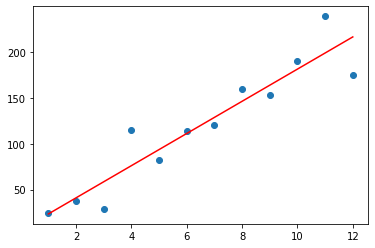

In [47]:
plt.scatter(x,y)
plt.plot(x,data['predições'],color='red')